Homework 2
MA 506 Probability and Statistical Inference: Fall 2023
Due: October 17 (Tuesday), 11:59pm
100 points
Question 1: Exploratory Data Analysis(30 points)
For this problem we will be using the wine dataset. The dataset is available di-
rectly from sklearn (load wine()). Here, just consider the 13 attributes (ignoring
the class). The idea is to predict the Alcohol value using other 12 attributes. So,
in essence you have 12 features and 1 target. For this dataset, do the following:
1. (5 points) Visualize the dataset as a pandas dataframe with proper column
names. Here:
• First 12 columns should represent the 12 features
• 13th column should be the alcohol value
2. (5 points) Plot scatterplots of alcohol value vs each of the features. Since
there are 12 features, plot the 12 scatterplots in a grid of 3 × 4.
3. (5 points) Looking at the scatterplots above, which feature do you think
will be most useful in predicting the alcohol value ? Which feature will be
least helpful ? Explain.
4. (15 points) In your opinion, what information, the following observations
will give regarding the alcohol content (increase or decrease). You can use
any method of your choice to make this decision. Make sure to explain
your reasoning
• Increased value of Color intensity
• Reduced value of Proline
• Increased Magnesium but reduced Ash value

Question 2: Regression (70 points)
Now, just considering the feature ‘proline’ to predict the alcohol value
1
1. (10 points) Fit a straight line: alcohol = β0 + β1proline. Plot this line
over the scattered data. Compute the R2 metric for this model. Please
note that R2 quantifies the quality of a regression model and is defined as
R2 = 1 − Residual sum of squares
T otal sum of squares = 1 −
Pn
i=1(yi − ˆyi)2
Pn
i=1(yi −  ̄y)2
Here yi, are the observed y values, ˆy are the corresponding predicted y
values and  ̄y is the average of all y values. Additionally, n is the number
of data points. Please note that R2 values vary between 0 and 1 with 1
representing a perfect fit to the data points.
2. (20 points) Draw another plot, but this time with the above straight line
model, also plot the graph of polynomials with degree 2,3,4 and 5 fitted
over the same scattered data (alcohol vs proline). The graph legend should
include the R2 value of all 5 models.
3. (10 points) Looking at the 5 models in previous part, which model do you
think is the best. Explain. You can use any criteria of your choice to
choose the best model.
4. (10 points) Consider just the quadratic polynomial model (alcohol = β0 +
β1proline + β1proline2), plot the quadratic curve fitted to this data along
with 95% t-confidence interval and 95% t-prediction interval. Use different
colors and opaqueness to improve the visibility of the different intervals.
Why do you think the confidence interval is contained in the prediction
interval ?
5. (20 points) With the same alcohol vs proiline data, plot a figure with 6
subplots. Here subplot 1 to 6 should show polynomial model of degree 1 to
6 respectively with corresponding 95% t-confidence intervals. Comment
on the thickness of these intervals. For which model is the confidence
interval most broad ? What information does this plot provide you ?
2


In [1]:

from sklearn.datasets import load_wine
wine = load_wine()
import matplotlib.pyplot as plt
import pandas as pd
type(wine)
#print(wine.DESCR)

sklearn.utils._bunch.Bunch

In [2]:
#Q1.1
df = pd.DataFrame(wine.data,columns = wine.feature_names)
type(df)
#df.describe(include = 'all')
CO = [ 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'alcohol']
df = df[CO]
df


malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0          1.71  2.43               15.6      127.0           2.80   
1          1.78  2.14               11.2      100.0           2.65   
2          2.36  2.67               18.6      101.0           2.80   
3          1.95  2.50               16.8      113.0           3.85   
4          2.59  2.87               21.0      118.0           2.80   
..          ...   ...                ...        ...            ...   
173        5.65  2.45               20.5       95.0           1.68   
174        3.91  2.48               23.0      102.0           1.80   
175        4.28  2.26               20.0      120.0           1.59   
176        2.59  2.37               20.0      120.0           1.65   
177        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  alcohol  
0                            3.92   1065.0    14.23  
1                            3.40   1050.0    13.20  
2                            3.17   1185.0    13.16  
3                            3.45   1480.0    14.37  
4                            2.93    735.0    13.24  
..                            ...      ...      ...  
173                          1.74    740.0    13.71  
174                          1.56    750.0    13.40  
175                          1.56    835.0    13.27  
176                          1.62    840.0    13.17  
177                          1.60    560.0    14.13  

[178 rows x 13 columns]

In [3]:
#Q1.2
import numpy as np
X = wine.data[:,:12]
y = wine.data[:,-1]
print(X.shape)
print(y.shape)

(178, 12)
(178,)


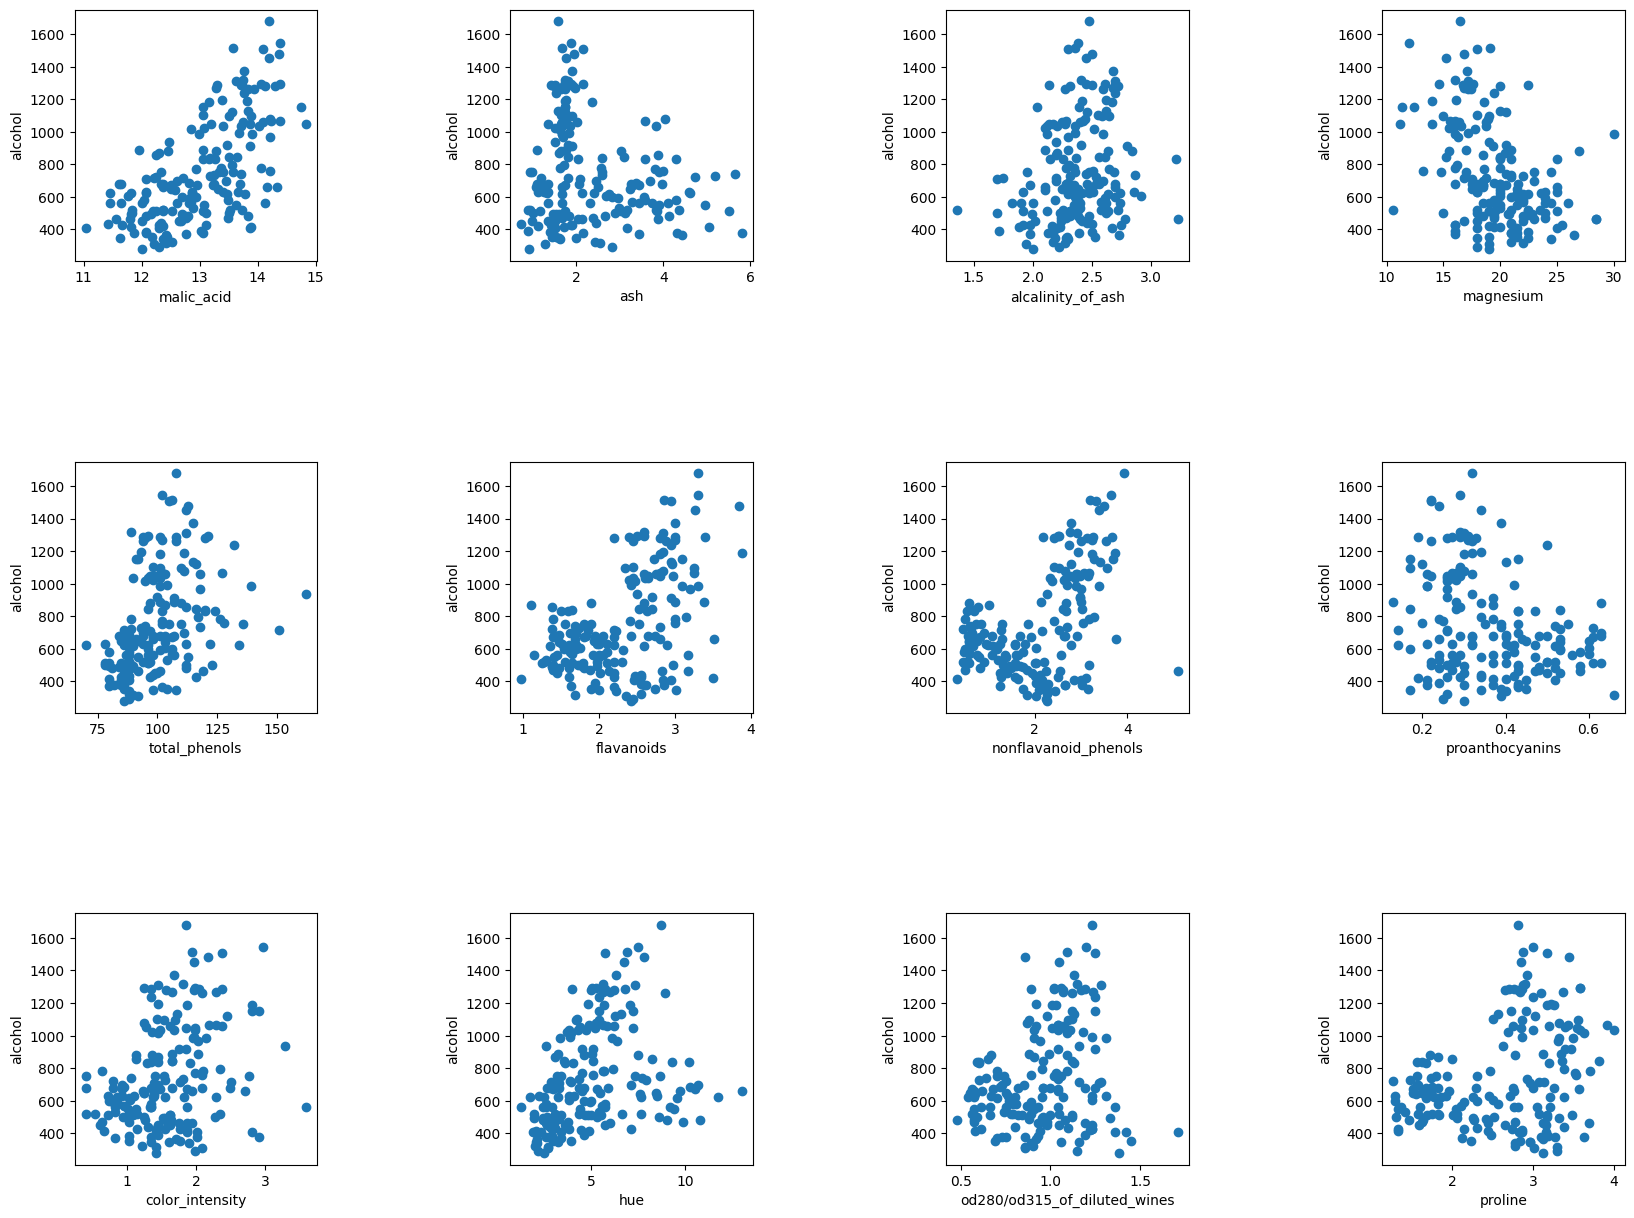

In [4]:
#Q1.2 Cont.
fig = plt.figure(figsize=(20,15))

for n in range(X.shape[1]):
    ax = fig.add_subplot(3,4,n+1)
    plt.subplots_adjust(hspace=0.8, wspace = .8)
    plt.scatter(X[:,n],y)
    ax.set_xlabel(df.columns[n])
    ax.set_ylabel('alcohol')


#Q1.3
I think that due to Malic_Acid having the strongest positive correlation between it's values and the Alcohol values, then it is the most useful scatter plot in showing the what feature directly increases alcohol value.

I think that the proanthocyanins scatter plot is the least helpful due to the randomness within the plot. There is little to no correlation between the columns, which only shows how not useful it is.

#Q1.4

The color intensity did increase with the alcohol content in a positive correlation for the most part. However, based on what I am seeing, the two are independent of one another. For the reduced value in proline, I would argue the correlation is negative if any correlation is there at all. Both seem to be independent of one another based on what I am seeing. Magnesium seems to have a negative correlation. The higher the Magnesium content the lower the alcohol content. The reduced ash value is shown with almost a straigh up and down correlation between it and the alcohol value. I believe that this shows where there is an optimal amount of ash that is acceptable in the wine, and it is not related to the alcohol level.

Below you can also view a correlation matrix as a heatmap to display the correlation between the different overall features to view my above statements.

<Axes: >

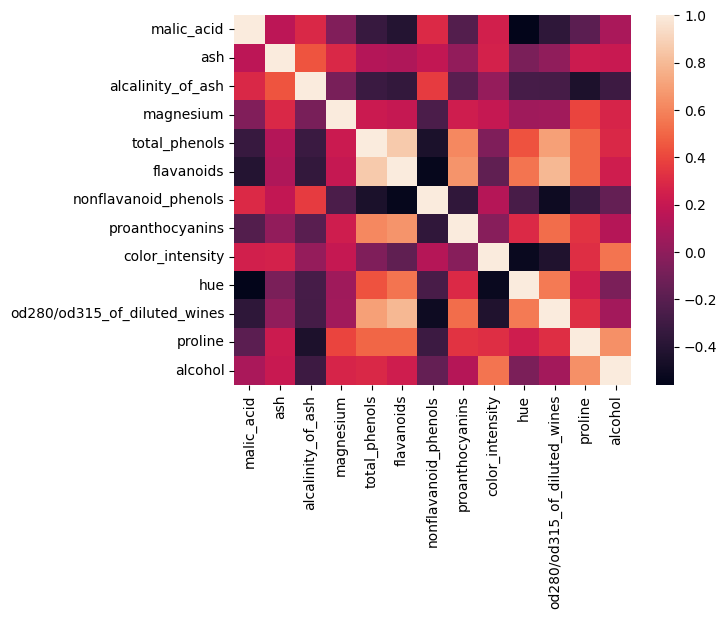

In [5]:
import seaborn as sns
%matplotlib inline

auto_df = df[CO]
corr = auto_df.select_dtypes('number').corr()
sns.heatmap(corr)

In [6]:
X.shape

(178, 12)

In [7]:
#Q2.1
X = np.array(df['proline']);
y = np.array(df['alcohol'])
print(X.shape)
print(y.shape)

(178,)
(178,)


In [8]:
#Q2.1 cont.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)

        X.append(temp)
    return np.array(X)

XX = poly_power(X,1)
XX.shape

(178, 2)

In [9]:
#Q2.1 cont.
beta = np.linalg.inv(XX.T.dot(XX)).dot(XX.T.dot(y))
beta

array([1.17611485e+01, 1.65950018e-03])

In [10]:
#Q2.1 cont.
xpred = np.linspace(0,1750,100)
Xpred = poly_power(xpred,1)
Xpred.shape
ypred = Xpred.dot(beta)
ypred.shape


(100,)

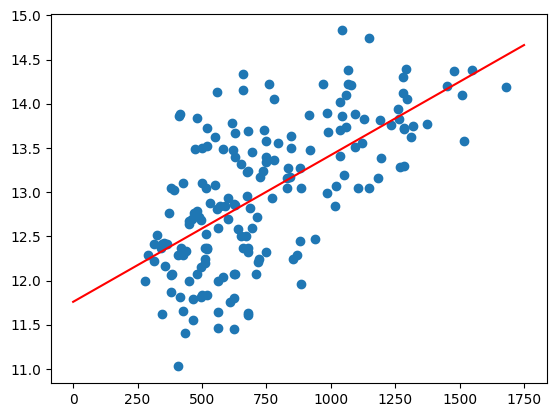

In [11]:
#Q2.1
#create x and y axis labels
plt.scatter(X,y)
plt.plot(xpred,ypred,color = 'r')
plt.show()

In [12]:
yhat = XX.dot(beta)

In [13]:
from sklearn.metrics import r2_score
r2 = (r2_score(y,yhat))
print(r2)
#reference: https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

0.41437548626472054


In [14]:
#Q2.1 cont.
def r_2(y, yhat):
    top = 0
    bottom = 0
    for i in range(0,178):
        top += ((y[i]-yhat[i])**2)
        bottom += ((y[i]-y.mean())**2)
    R2 = 1 - (top/bottom)
    return R2
R_2 = r_2(y, yhat)
print(R_2)

0.4143754862647203


In [15]:
#Q2.2
XX = poly_power(X,2)

betaL = []
yhatL = []
XXL = []
R_two = []
Xpred = []
Ypred = []

for i in range(0,5):
    XXL.append(poly_power(X, i+1))
    betaL.append(np.linalg.inv(XXL[i].T.dot(XXL[i])).dot(XXL[i].T.dot(y)))
    yhatL.append(XXL[i].dot(betaL[i]))
    R_two.append(r_2(y,yhatL[i]))
    Xpred.append(poly_power(xpred,i+1))
    Ypred.append(Xpred[i].dot(betaL[i]))

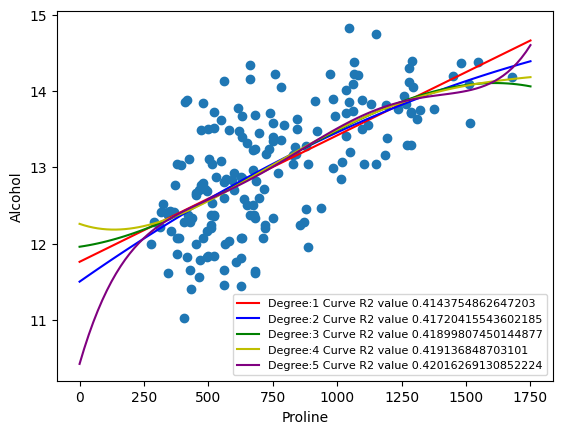

In [16]:
plt.scatter(X,y)
plt.plot(xpred,Ypred[0],color = 'r', label = f'Degree:1 Curve R2 value {R_two[0]}')
plt.plot(xpred,Ypred[1],color = 'b', label = f'Degree:2 Curve R2 value {R_two[1]}')
plt.plot(xpred,Ypred[2],color = 'g', label = f'Degree:3 Curve R2 value {R_two[2]}')
plt.plot(xpred,Ypred[3],color = 'y', label = f'Degree:4 Curve R2 value {R_two[3]}')
plt.plot(xpred,Ypred[4],color = 'purple', label = f'Degree:5 Curve R2 value {R_two[4]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.show()

#Q2.3

I would argue that the blue line or second degree polynomial/ quadratic is the best fit for this model. I think it more accurately reflects the correlation of the data points within the scatter plot without curving to much to "force fit" like the higher degree polynomial lines do. It's smooth while still following the positive correlation.

In [17]:
#Q2.4
xp = poly_power(xpred, 2)
yp = xp.dot(betaL[1])
#plt.plot(xpred,yp,color = 'b')
#plt.scatter(X,y)
e = y - XX.dot(betaL[1])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std

0.6232884455591964

In [18]:
term1 = np.diag(xp.dot(np.linalg.inv(XX.T.dot(XX))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2

Text(0, 0.5, 'Alcohol')

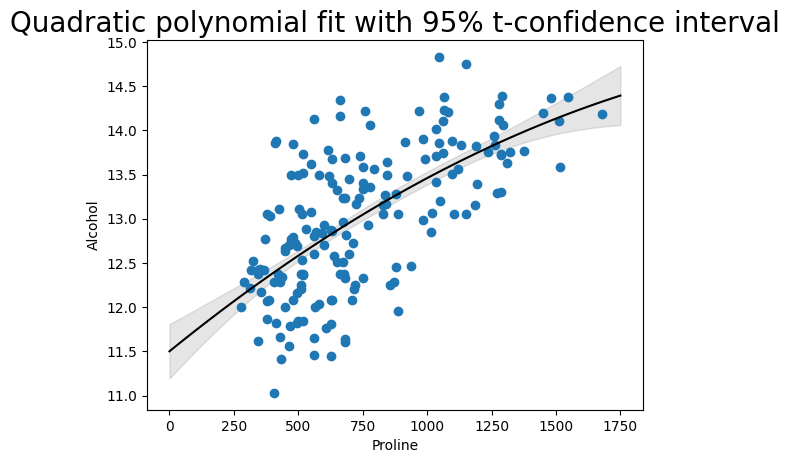

In [19]:
#Q2.4
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.1,color = 'k')
plt.scatter(X,y)
plt.title('Quadratic polynomial fit with 95% t-confidence interval',size= 20)
plt.xlabel('Proline');plt.ylabel('Alcohol')
#plt.show()

In [20]:
#Q2.4
a = np.linalg.inv(XXL[1].T.dot(XXL[1]))
b = Xpred[1].dot(a).dot(Xpred[1].T)
b.shape

(100, 100)

In [21]:
var = np.diag(b)
std_vector = np.sqrt(1 + var)
std_vector.shape
std_dev = std*std_vector
std_dev.shape

(100,)

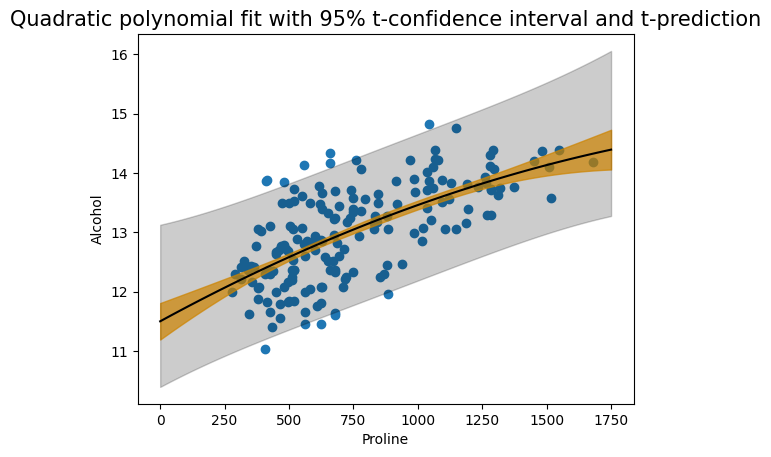

In [22]:
#Q2.4 final answer
import scipy
n = 442
p = 3
alpha = 0.05
stdev_t = scipy.stats.t.ppf(1 - alpha/2.,n-p)*std_dev
plt.scatter(X,y)
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Quadratic polynomial fit with 95% t-confidence interval and t-prediction',size= 15)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()


#Q2.4
In my opinion, the confidence interval is contained inside the T-prediction becuase the 1 + variance inside the st.dev^ formula creates a bigger width of possible values. We can notice this difference in the formula in the previous Jupyter notebook lectures as well. In other words, I would explain that prediction intervals have more uncertainty intrinsically due to them being predictions. Therefore, we have to compensate for that by having a wider range of values.

"Notice that the formula for a prediction interval contains an extra one in the square root portion, which means the standard error will always be larger than a confidence interval." (Statology)

Reference:
https://www.statology.org/confidence-interval-vs-prediction-interval/

#Q2.5 With the same alcohol vs proiline data, plot a figure with 6 subplots. Here subplot 1 to 6 should show polynomial model of degree 1 to 6 respectively with corresponding 95% t-confidence intervals. Comment on the thickness of these intervals. For which model is the confidence interval most broad ? What information does this plot provide you ? 2

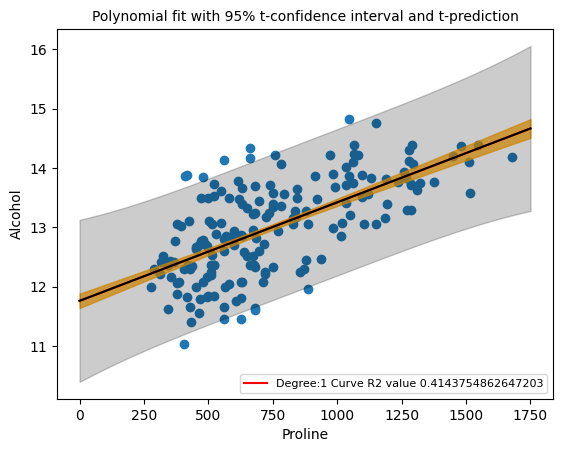

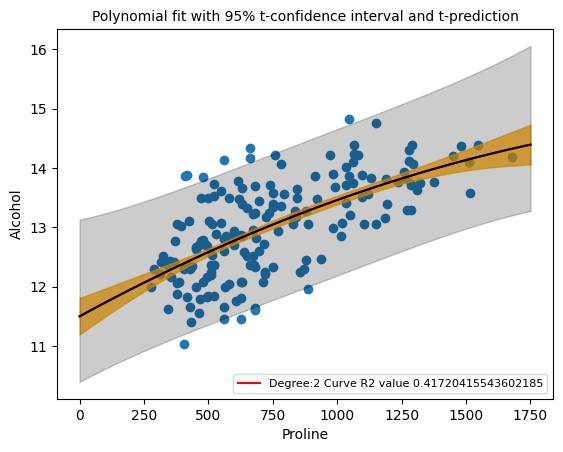

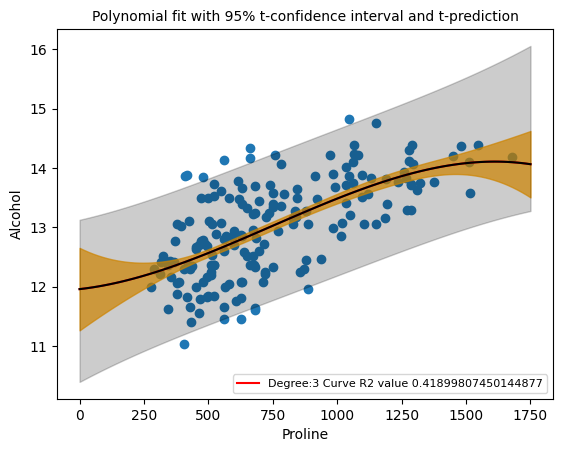

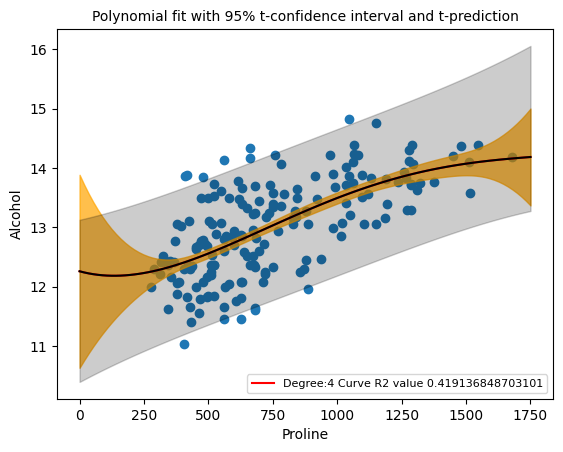

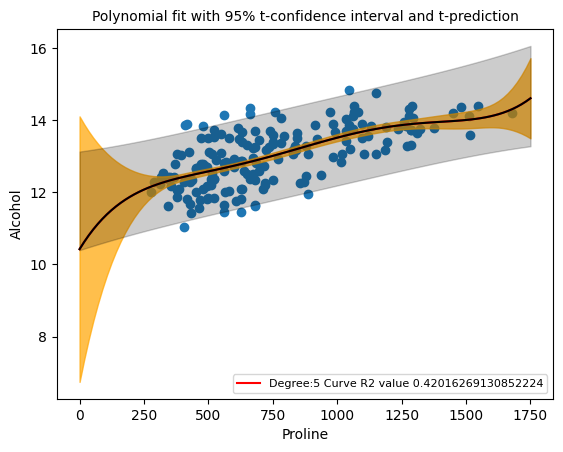

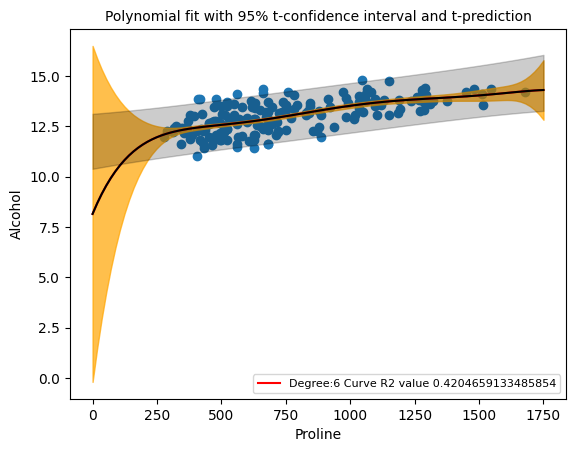

<Figure size 640x480 with 0 Axes>

In [23]:

xp = poly_power(xpred, 1)
yp = xp.dot(betaL[0])

a = np.linalg.inv(XXL[0].T.dot(XXL[0]))
b = Xpred[0].dot(a).dot(Xpred[0].T)
b.shape
e = y - XXL[0].dot(betaL[0])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[0].T.dot(XXL[0]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2

plt.show()
plt.scatter(X,y)
plt.plot(xpred,Ypred[0],color = 'r', label = f'Degree:1 Curve R2 value {R_two[0]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
fig = plt.figure()


xp = poly_power(xpred, 2)
yp = xp.dot(betaL[1])

a = np.linalg.inv(XXL[1].T.dot(XXL[1]))
b = Xpred[1].dot(a).dot(Xpred[1].T)
b.shape
e = y - XXL[1].dot(betaL[1])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[1].T.dot(XXL[1]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2


plt.scatter(X,y)
plt.plot(xpred,Ypred[1],color = 'r', label = f'Degree:2 Curve R2 value {R_two[1]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
plt.savefig('1,2')

xp = poly_power(xpred, 3)
yp = xp.dot(betaL[2])

a = np.linalg.inv(XXL[2].T.dot(XXL[2]))
b = Xpred[2].dot(a).dot(Xpred[2].T)
b.shape
e = y - XXL[2].dot(betaL[2])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[2].T.dot(XXL[2]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2


plt.scatter(X,y)
plt.plot(xpred,Ypred[2],color = 'r', label = f'Degree:3 Curve R2 value {R_two[2]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
plt.savefig('2,1')

xp = poly_power(xpred, 4)
yp = xp.dot(betaL[3])

a = np.linalg.inv(XXL[3].T.dot(XXL[3]))
b = Xpred[3].dot(a).dot(Xpred[3].T)
b.shape
e = y - XXL[3].dot(betaL[3])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[3].T.dot(XXL[3]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2


plt.scatter(X,y)
plt.plot(xpred,Ypred[3],color = 'r', label = f'Degree:4 Curve R2 value {R_two[3]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
plt.savefig('2,2')

xp = poly_power(xpred, 5)
yp = xp.dot(betaL[4])

a = np.linalg.inv(XXL[4].T.dot(XXL[4]))
b = Xpred[4].dot(a).dot(Xpred[4].T)
b.shape
e = y - XXL[4].dot(betaL[4])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[4].T.dot(XXL[4]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2


plt.scatter(X,y)
plt.plot(xpred,Ypred[4],color = 'r', label = f'Degree:5 Curve R2 value {R_two[4]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
plt.savefig('3,1')

betaL = []
yhatL = []
XXL = []
R_two = []
Xpred = []
Ypred = []
for i in range(0,6):
    XXL.append(poly_power(X, i+1))
    betaL.append(np.linalg.inv(XXL[i].T.dot(XXL[i])).dot(XXL[i].T.dot(y)))
    yhatL.append(XXL[i].dot(betaL[i]))
    R_two.append(r_2(y,yhatL[i]))
    Xpred.append(poly_power(xpred,i+1))
    Ypred.append(Xpred[i].dot(betaL[i]))


xp = poly_power(xpred, 6)
yp = xp.dot(betaL[5])

a = np.linalg.inv(XXL[5].T.dot(XXL[5]))
b = Xpred[5].dot(a).dot(Xpred[5].T)
b.shape
e = y - XXL[5].dot(betaL[5])
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std
term1 = np.diag(xp.dot(np.linalg.inv(XXL[5].T.dot(XXL[5]))).dot(xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2


plt.scatter(X,y)
plt.plot(xpred,Ypred[5],color = 'r', label = f'Degree:6 Curve R2 value {R_two[5]}')
plt.rc('legend',fontsize=8)
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.plot(xpred,yp,color = 'black')
plt.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.7,color = 'orange')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.2, color = 'black')
plt.title('Polynomial fit with 95% t-confidence interval and t-prediction',size= 10)
plt.xlabel('Proline');plt.ylabel('Alcohol')
plt.show()
plt.savefig('3,2')

betaL = []
yhatL = []
XXL = []
R_two = []
Xpred = []
Ypred = []
for i in range(0,6):
    XXL.append(poly_power(X, i+1))
    betaL.append(np.linalg.inv(XXL[i].T.dot(XXL[i])).dot(XXL[i].T.dot(y)))
    yhatL.append(XXL[i].dot(betaL[i]))
    R_two.append(r_2(y,yhatL[i]))
    Xpred.append(poly_power(xpred,i+1))
    Ypred.append(Xpred[i].dot(betaL[i]))



#Q2.5
The last plot as a sixth degree polynomial is the least useful and has the most thick confidence interval shown. It is because the interval is unable to accurately predict the data within the parameters because we have too many parameters. The accuracy of the model is decreasing after the quadratic plot.

References:
Q1
https://www.youtube.com/watch?v=C3CY102ws78
